### Check file directly

In [1]:
import os

path = r"C:\Users\admin\Desktop\New folder (4)\free-spoken-digit-dataset\recordings"
files = os.listdir(path)
print("Files in the directory:")
for file in files:
    print(file)


Files in the directory:
0_george_0.wav
0_george_1.wav
0_george_10.wav
0_george_11.wav
0_george_12.wav
0_george_13.wav
0_george_14.wav
0_george_15.wav
0_george_16.wav
0_george_17.wav
0_george_18.wav
0_george_19.wav
0_george_2.wav
0_george_20.wav
0_george_21.wav
0_george_22.wav
0_george_23.wav
0_george_24.wav
0_george_25.wav
0_george_26.wav
0_george_27.wav
0_george_28.wav
0_george_29.wav
0_george_3.wav
0_george_30.wav
0_george_31.wav
0_george_32.wav
0_george_33.wav
0_george_34.wav
0_george_35.wav
0_george_36.wav
0_george_37.wav
0_george_38.wav
0_george_39.wav
0_george_4.wav
0_george_40.wav
0_george_41.wav
0_george_42.wav
0_george_43.wav
0_george_44.wav
0_george_45.wav
0_george_46.wav
0_george_47.wav
0_george_48.wav
0_george_49.wav
0_george_5.wav
0_george_6.wav
0_george_7.wav
0_george_8.wav
0_george_9.wav
0_jackson_0.wav
0_jackson_1.wav
0_jackson_10.wav
0_jackson_11.wav
0_jackson_12.wav
0_jackson_13.wav
0_jackson_14.wav
0_jackson_15.wav
0_jackson_16.wav
0_jackson_17.wav
0_jackson_18.wav
0

### Load the dataset

In [2]:
import os
import numpy as np

def load_dataset(path):
    """
    Load audio dataset and extract labels based on filenames.

    Parameters:
        path (str): Path to the dataset folder containing audio files.

    Returns:
        audio_files (list): List of file paths for valid audio files.
        labels (numpy.ndarray): Array of integer labels extracted from filenames.
    """
    audio_files = []
    labels = []
    for file_name in os.listdir(path):
        # Check if file is a valid WAV file and starts with a digit
        if file_name.endswith(".wav") and file_name[0].isdigit():
            try:
                # Extract label (assumes label is the integer prefix before '_')
                label = int(file_name.split('_')[0])
                file_path = os.path.join(path, file_name)
                audio_files.append(file_path)
                labels.append(label)
            except ValueError as e:
                print(f"Skipping file {file_name} due to label extraction error: {e}")
        else:
            print(f"Skipping non-conforming file: {file_name}")
    
    # Convert labels to NumPy array
    return audio_files, np.array(labels)

# Path to your dataset
DATASET_PATH = r"C:\Users\admin\Desktop\New folder (4)\free-spoken-digit-dataset\recordings"

# Load dataset
audio_files, labels = load_dataset(DATASET_PATH)
print(f"Loaded {len(audio_files)} audio files with labels.")


Skipping non-conforming file: reference_audio_seven.wav
Skipping non-conforming file: student_audio_seven.wav
Loaded 3000 audio files with labels.


### Extract features

In [5]:
def extract_features(file_paths):
    features = []
    for file_path in file_paths:
        y, sr = librosa.load(file_path, sr=None)
        n_fft = min(len(y), 2048)  # Set n_fft to the smaller of 2048 or the signal length
        mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13, n_fft=n_fft)
        mfcc_mean = np.mean(mfcc.T, axis=0)  # Mean across time
        features.append(mfcc_mean)
    return np.array(features)


In [6]:
import librosa
import numpy as np

def extract_features(file_paths):
    """
    Extract MFCC features from audio files.

    Parameters:
        file_paths (list): List of audio file paths.

    Returns:
        features (numpy.ndarray): Extracted MFCC features.
    """
    features = []
    for file_path in file_paths:
        try:
            y, sr = librosa.load(file_path, sr=None)  # Load audio file
            mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)  # Extract 13 MFCCs
            mfcc_mean = np.mean(mfcc.T, axis=0)  # Mean across time
            features.append(mfcc_mean)
        except Exception as e:
            print(f"Error processing {file_path}: {e}")
    return np.array(features)

# Extract features
features = extract_features(audio_files)
print(f"Extracted features shape: {features.shape}")


Extracted features shape: (3000, 13)


### Split the Data

In [7]:
from sklearn.model_selection import train_test_split

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)
print(f"Training samples: {X_train.shape[0]}, Test samples: {X_test.shape[0]}")


Training samples: 2400, Test samples: 600


### Train the Model with GridSearchCV

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the model
clf = RandomForestClassifier(random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_
print(f"Best parameters: {grid_search.best_params_}")


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}


### Evaluate the Model

In [9]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predict on the test set
y_pred = best_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.2f}")

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Test Accuracy: 0.92
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.93      0.92        72
           1       0.98      0.86      0.91        69
           2       0.85      0.82      0.84        57
           3       0.90      0.82      0.86        56
           4       0.95      0.97      0.96        59
           5       0.97      0.95      0.96        63
           6       0.89      0.98      0.93        56
           7       0.88      0.95      0.91        55
           8       0.98      0.95      0.96        57
           9       0.89      1.00      0.94        56

    accuracy                           0.92       600
   macro avg       0.92      0.92      0.92       600
weighted avg       0.92      0.92      0.92       600



### Confusion Matrix Visualization

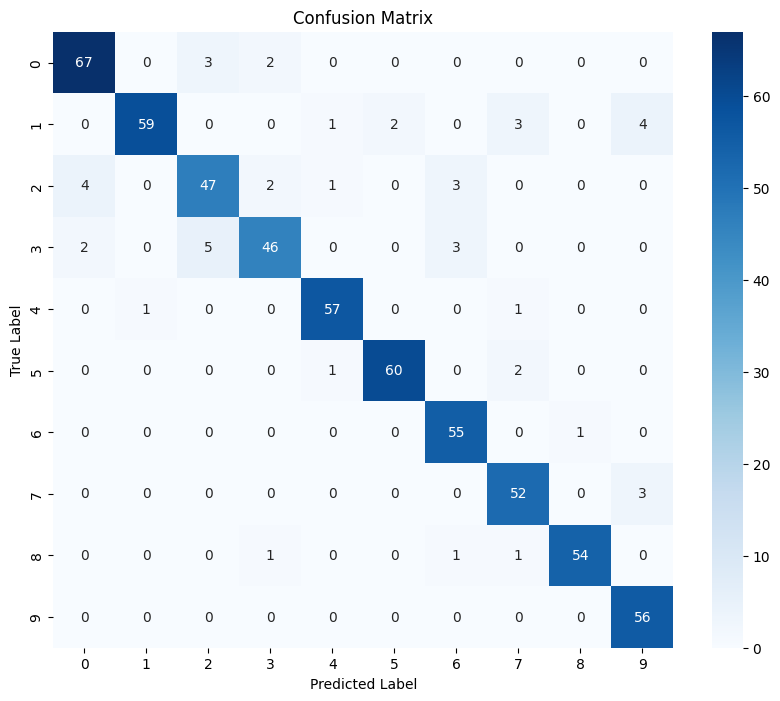

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


### Save the Model

In [11]:
import joblib

# Save the best model
model_path = "best_audio_classifier.pkl"
joblib.dump(best_model, model_path)
print(f"Model saved to {model_path}")


Model saved to best_audio_classifier.pkl
